In [1]:
import autograd.numpy as np
from autograd import grad, hessian, jacobian
from scipy.optimize import minimize

In [2]:
import matplotlib.pyplot as plt
from counterfactual_functions import *
from helper import *

username='boraozaltun'

data_dict = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/final_data/data_subset_20200304.pickle')

reg_2_num = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/GTAP/mapping/reg_2_num.pickle')
comm_2_num = load_obj('/Users/'+username+'/Dropbox (MIT)/Data/Trade/general_equilibrium_gravity/GTAP/mapping/comm_2_num.pickle')

n = data_dict['n']
g = data_dict['g']
k = data_dict['k']

data_dict['R_hat'] = np.ones((n, g))
data_dict['R_hat'][reg_2_num['usa'], 3] = 2.
data_dict['R_hat'][reg_2_num['usa'], 4] = 2.



X_0 = np.ones(n*g + n)*0.5


eval_F = lambda x: reduced_counterfactual_overdetermined(x, data_dict)
eval_f = lambda x: np.sum(eval_F(x)**2)
# eval_f = lambda x: np.linalg.norm(eval_F(x))

eval_grad_f = grad(eval_f)
eval_jac_F = jacobian(eval_F)
eval_hess_f = hessian(eval_f)
bounds_f = [(1e-14, None) for x in range(n*g+n)]

In [3]:
# np.linalg.cond(eval_jac_F(X_0))

In [9]:
sol = minimize(eval_f, X_0*2, jac=eval_grad_f, hess=eval_hess_f,\
               method="Newton-CG",bounds=bounds_f, options={'ftol':1e-9,'disp':True})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Newton-CG cannot handle constraints nor bounds.
  RuntimeWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: Unknown solver options: ftol
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/autograd/numpy/numpy_vjps.py:444: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return lambda g: g[idxs]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/autograd/numpy/numpy_boxes.py:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is dep

Optimization terminated successfully.
         Current function value: 0.000440
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 24
         Hessian evaluations: 12


In [10]:
sol.x

array([1.0074615 , 1.0123674 , 1.01286379, 0.91943465, 0.93635671,
       1.00536552, 1.00697982, 1.01076079, 1.01335893, 0.92391332,
       1.01009719, 1.00147911, 1.00972869, 1.01111753, 1.01278022,
       0.92509106, 0.86396259, 1.00464941, 1.00358716, 1.00644879,
       1.01263727, 0.90148254, 0.96527171, 1.00095415, 1.00674836,
       1.01495136, 1.01104748, 0.98137704, 0.91589929, 0.98994977,
       1.00378007, 1.01032126, 1.0116909 , 0.88992461, 0.90708422,
       1.00099319, 1.00906654, 1.01095078, 1.01204855, 0.9258207 ,
       0.95016162, 0.99786007, 0.97905859, 0.9997306 , 1.01042748,
       0.93169792, 0.88602142, 1.00633891, 1.01020406, 1.00812501,
       1.01568779, 0.87923254, 0.94403058, 0.99932567, 0.99778282,
       1.00835185, 1.00388573, 0.91473522, 0.97736432, 1.00537795,
       0.97393306, 1.00636601, 1.01062026, 0.90892783, 0.88817588,
       0.97026633, 1.0094476 , 1.01117146, 1.01222651, 0.9259197 ,
       0.94423831, 1.00603408, 1.0003862 , 0.99614223, 1.00865

In [11]:
sol.success

True

In [12]:
sol

     fun: 0.0004398642636907132
     jac: array([ 3.50353786e-05,  9.20862349e-05, -2.66214629e-03,  2.63391561e-04,
        1.19414084e-04, -1.13217824e-04, -2.66697907e-05,  1.20751904e-04,
        2.10897621e-04,  5.32568404e-04,  2.28633659e-06, -3.76783034e-05,
        3.09280568e-04, -7.28647742e-05, -5.49171059e-05,  7.39616002e-04,
       -2.00565755e-04, -2.19751060e-04, -2.98449426e-04, -4.23589704e-04,
       -5.06206038e-04, -9.96613202e-05, -2.79841877e-04, -1.03453815e-03,
        9.72357768e-05, -3.12947597e-05,  5.79967090e-04,  9.39762472e-05,
       -4.33445141e-04, -2.04073738e-05, -3.03805785e-04, -1.97749516e-05,
       -1.27486755e-03, -5.45179325e-04,  1.61970661e-04, -1.10282850e-03,
        1.33479028e-04,  3.69166433e-05, -1.52096167e-04,  1.63723705e-04,
        1.13604716e-04,  1.09451397e-04, -5.64003932e-05, -9.62574522e-05,
        3.73382566e-05, -3.54048843e-04,  5.21361817e-04,  9.72497726e-05,
        1.05253515e-04,  1.02937473e-04, -8.32474783e-05, 

In [13]:
## Seems like constraining the length of w_hat and r_hat works! Try to justify this later!

In [14]:
r_hat_star, w_hat_star = get_values_from_X_reduced(sol.x, data_dict)

In [15]:
E_hat_star = get_E_hat(w_hat_star, r_hat_star, data_dict)

In [16]:
E_hat_star.sum()

134.5452671374543

In [17]:
r_hat_star[reg_2_num['usa'], 3]

0.6546530747560448

In [18]:
r_hat_star[reg_2_num['usa'], 4]

0.5416000875344383

In [19]:
import seaborn as sns

In [21]:
C_goods = ['farm', 'food', 'coa', 'oil','gas', 'oxd']
F_goods = ['man','bus','oxd','trans','util']
num_2_reg = reverse_dict(reg_2_num)

df_temp = pd.DataFrame(r_hat_star.T)
df_temp.set_index(pd.Series(C_goods), inplace=True)
df_temp.rename(columns=num_2_reg, inplace=True)

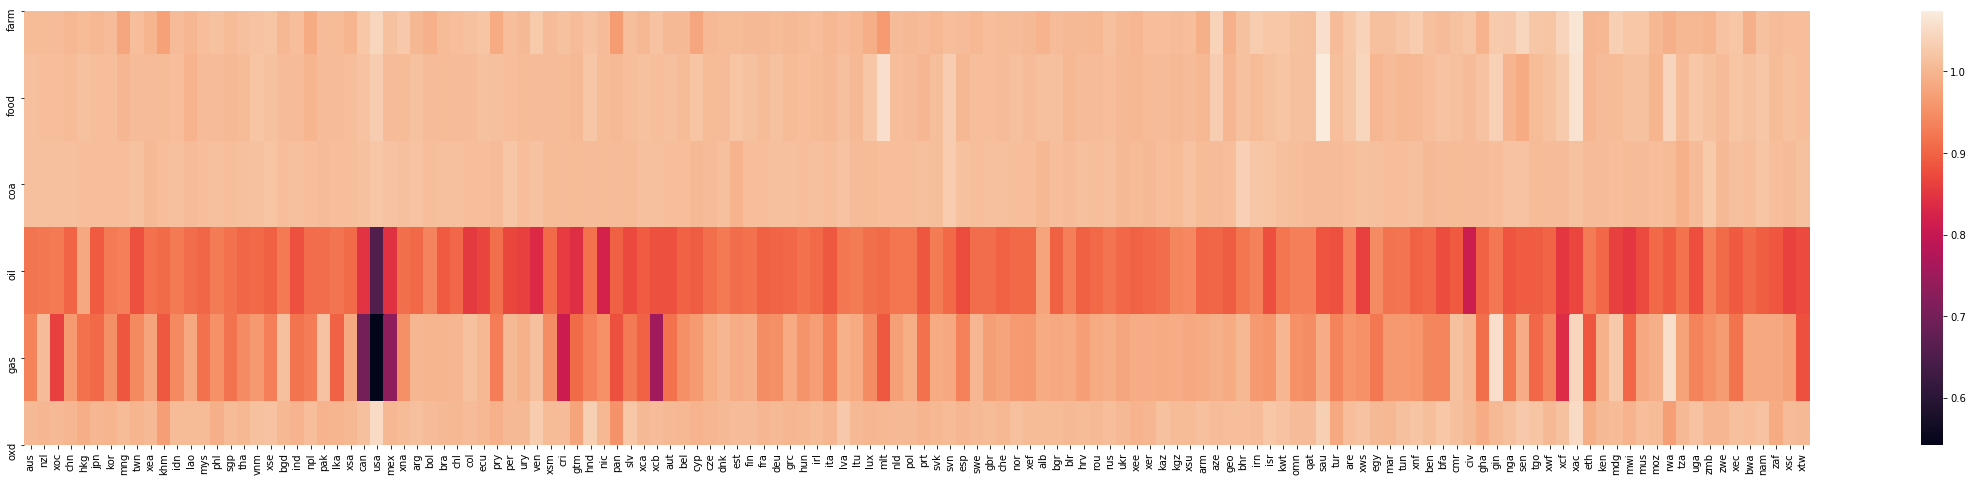

In [22]:
fig, ax = plt.subplots(figsize=(40, 8))
ax = sns.heatmap(df_temp)

plt.show()

In [23]:
C_goods = ['farm', 'food', 'coa', 'oil','gas', 'oxd']
F_goods = ['man','bus','oxd','trans','util']
num_2_reg = reverse_dict(reg_2_num)

df_temp = pd.DataFrame(w_hat_star.T)
df_temp.set_index(pd.Series(['Wage']), inplace=True)
df_temp.rename(columns=num_2_reg, inplace=True)

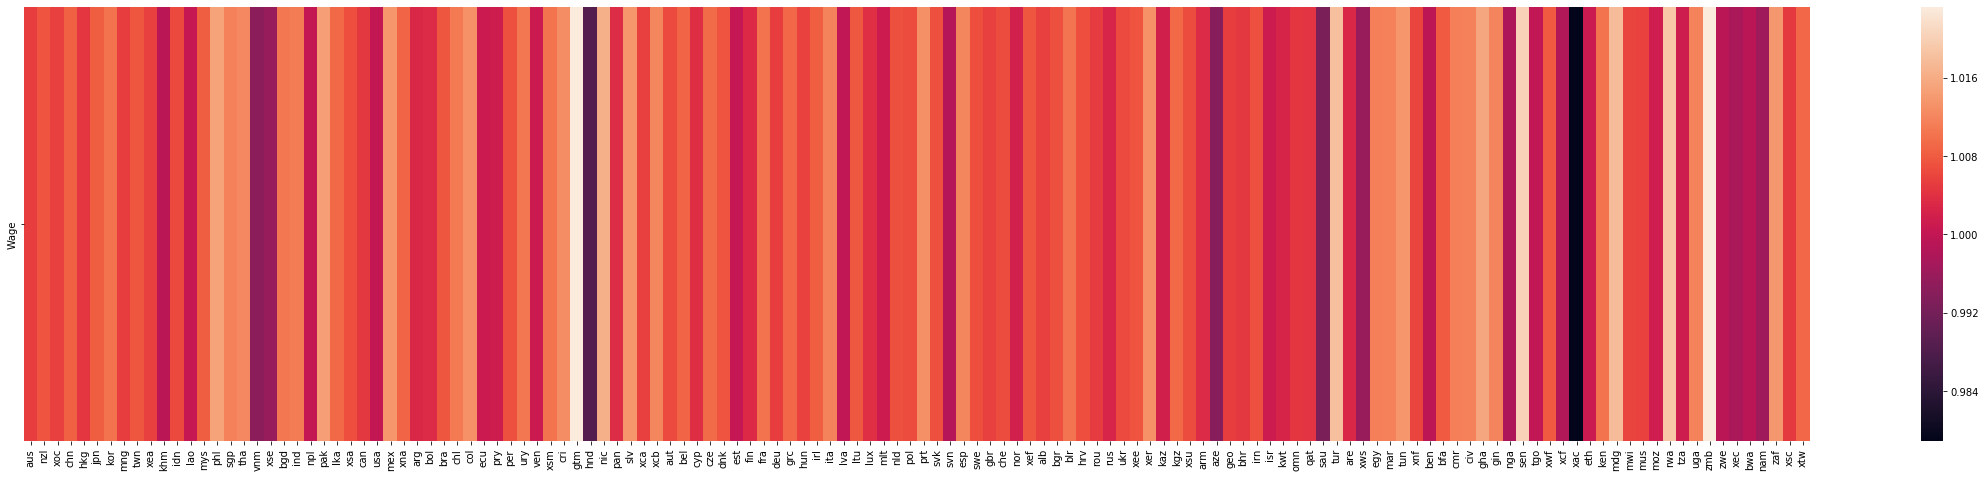

In [24]:
fig, ax = plt.subplots(figsize=(40, 8))
ax = sns.heatmap(df_temp)

plt.show()